# General presentation
## Machine Learning : Wine Classification                            
    Auteur : Thierry SANDOZ & Stephen MONNET                        
    Date : 10.06.2020  
    Contenu : Visualisation + prétraitement données

## Imported librairies and configurations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Normalization 
from sklearn import preprocessing

## Data separation 
from sklearn.model_selection import train_test_split 

## Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

### Import personal functions

In [2]:
from sys import path
path.append('functions')
from WineClassificationLib import correlationMatrix
from WineClassificationLib import histogram

## Ouverture des fichiers
Les données sont enregistrées en format csv et celles-ci sont séparées par des ';'. La fonction read_csv de Pandas permet directement d'ouvrir un fichier et de stocker les différentes données sous forme de tableau. Le tableau présent ci-dessous permet de visualiser un aperçu du contenu des ces données

In [3]:
dataWine = pd.read_csv("data/winequality-white.csv", sep=';')

## Affichage des 5 premières lignes de données
display(dataWine.head(n=5))

## Affichage du nombre de données
nb_data = len(dataWine)
print('Le nombre de données présentes dans le fichier (taille du dataset) est de :', nb_data)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Le nombre de données présentes dans le fichier (taille du dataset) est de : 4898


## Visualisation de diverses informations sur le dataset
Le tableau ci-dessous regroupe diverses informations sur les données tel que leur nombre, leur moyenne ou leur écart-type. La fonction describe() de Pandas permet directement d'afficher ce tableau. Ce tableau permet de vérifier si des données sont manquantes dans le dataset. On remarque que le nombre de données dans chaque colonne est correct, car celui-ci correspond au nombre total de données (taille du dataset)

In [4]:
display(np.round(dataWine.describe()))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0
mean,7.0,0.0,0.0,6.0,0.0,35.0,138.0,1.0,3.0,0.0,11.0,6.0
std,1.0,0.0,0.0,5.0,0.0,17.0,42.0,0.0,0.0,0.0,1.0,1.0
min,4.0,0.0,0.0,1.0,0.0,2.0,9.0,1.0,3.0,0.0,8.0,3.0
25%,6.0,0.0,0.0,2.0,0.0,23.0,108.0,1.0,3.0,0.0,10.0,5.0
50%,7.0,0.0,0.0,5.0,0.0,34.0,134.0,1.0,3.0,0.0,10.0,6.0
75%,7.0,0.0,0.0,10.0,0.0,46.0,167.0,1.0,3.0,1.0,11.0,6.0
max,14.0,1.0,2.0,66.0,0.0,289.0,440.0,1.0,4.0,1.0,14.0,9.0


### Visualisation de la répartition des données dans les diverses classes
Il est important d'observer la distribution des données dans les différentes classes. Ceci permet de déterminer si le nombre de données dans chacune des classes est assez élevés pour entraîner l'algorithme de deep learning. en observant l'histogramme ci-dessous, on se rend compte qu'il n'y a aucun résultats dans les classes (1, 2, 10) et  que les classes présentes aux extrémités (3, 4, 8, 9) ne sont pas beaucoup représentées. Il est donc important de réduire le nombre de classes pour obtenir des meilleurs résultats

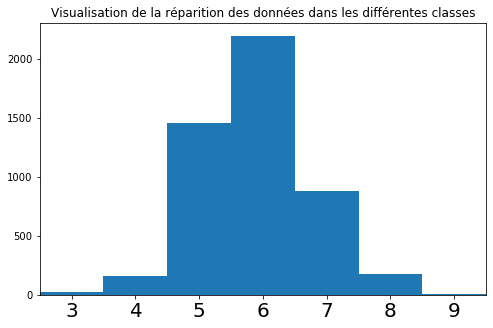

In [5]:
bins = np.arange(3, 11)
histogram(dataWine['quality'], bins, title = 'Visualisation de la réparition des données dans les différentes classes')

### Visualisation de la répartition des données après regroupement des classes
L'histogramme de la réparition des données après regroupement est observable ci-dessous. Pour l'obtenir, les classes ont été regroupés comme suit :
- 1, 2, 3, 4  => 0 (mauvais)
- 5           &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;=> 1 (assez bon)
- 6           &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;=> 2 (bon)
- 7           &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;=> 3 (très bon)
- 8, 9, 10    &nbsp;&nbsp;=> 4 (excellent)

On obtient finalement un nombre de 5 classes

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_categorical
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2


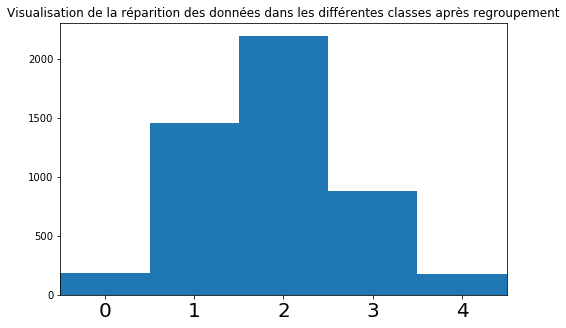

In [6]:
## Séparation des données en différentes classes : 1, 2, 3, 4 = mauvais, 5 = assez bon, 6 = bon, 7 = très bon, 8, 9, 10 => excellent
bins = [3,4,5,6,7,9]
quality_labels=[0,1,2,3,4]
dataWine['quality_categorical'] = pd.cut(dataWine['quality'], bins=bins, labels=quality_labels, include_lowest=True)

## Affichage des 5 premières lignes
display(dataWine.head(n=5))

## Ajout de features
#features_raw['density x residual sugar'] = dataWine['density'] * dataWine['residual sugar']
#features_raw['density x alcohol'] = dataWine['density'] * dataWine['alcohol']
#features_raw['fixed acidity x pH'] = dataWine['fixed acidity'] * dataWine['pH']

bins = np.arange(0, 6)
histogram(dataWine['quality_categorical'], bins, title = 'Visualisation de la réparition des données dans les différentes classes après regroupement')

### Affichage d'une matrice de corrélation
L'affichage d'une matrice de corrélation permet d'observer la corrélation entre les différentes features. Ceci permet donc d'observer si certaines features sont directement corrélées avec la qualité des vins voulant être obtenue. Dans le cas présent, on remarque que la qualité du vin est moyennement corrélée au taux d'alcool.
Cette matrice permettrait aussi, dans un cas où le nombre de features serait plus grand, de supprimer les données fortement corrélées entre elles de manière à réduire le temps de calcul et l'overfitting.

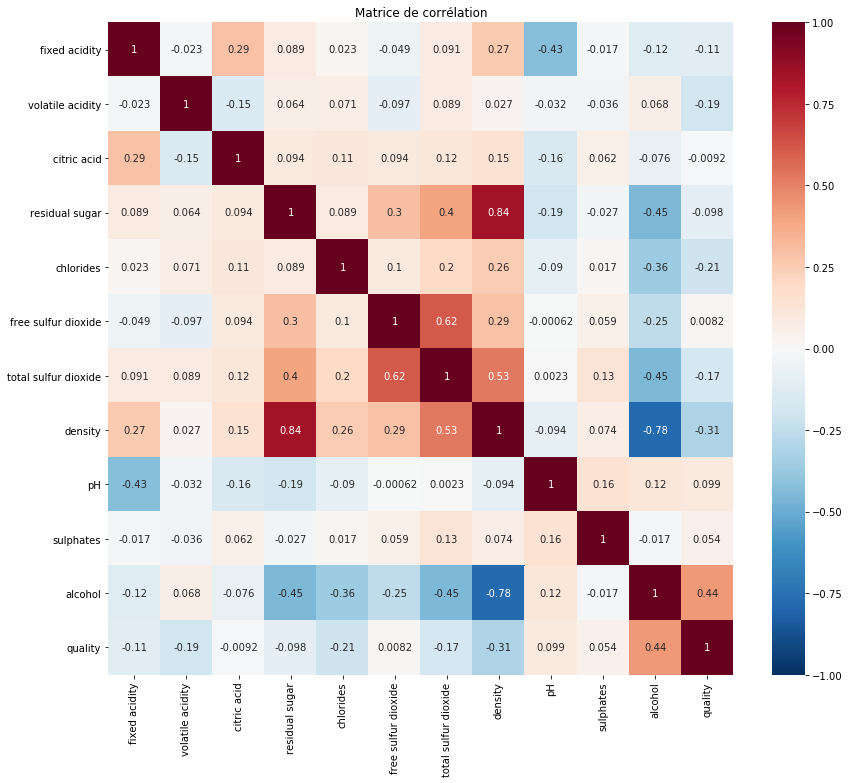

In [7]:
correlationMatrix(dataWine)

### Visualisation d'un graphique représentant l'alcool en fonction de la qualité
Comme on observe une corrélation plutôt élevée entre l'alcool et la qualité du vin, un graphique ayant pour axe x la qualité du vin et pour axe y le taux d'alcool a été affichée. La hauteur des barres correspond taux d'alcool moyen obtenu pour chacune des qualité et le trait noir présent sur ces barres correspond quant à lui à l'écart-type. Ce graphique permet d'observer si une relation linéaire est présente entre ces deux caractéristiques et ainsi déterminer si un algorithme de régession linéaire pourrait permettre de résoudre le problème. En observant ce graphique on remarque que ce n'est pas réellement le cas, de ce faite, l'appreoche de la classification est privilégiée.

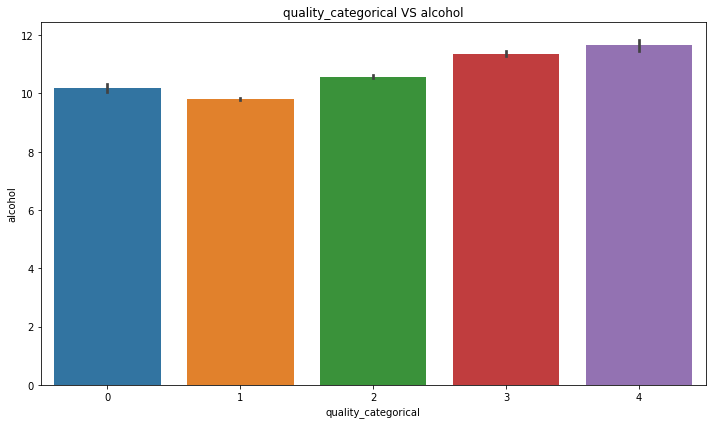

<Figure size 432x288 with 0 Axes>

In [8]:
volatileAcidity_quality = dataWine[['alcohol', 'quality_categorical']]
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality_categorical', y='alcohol', data=volatileAcidity_quality, ax=axs)
plt.title('quality_categorical VS alcohol')

plt.tight_layout()
plt.show()
plt.gcf().clear()

### Suppression des valeurs aberrantes

In [9]:
# For each feature find the data points with extreme high or low values
outliers = []
features_raw = dataWine.drop(['quality', 'quality_categorical'], axis = 1)
quality_raw = dataWine['quality_categorical']

for feature in features_raw.keys():

    Q1 = np.percentile(features_raw[feature], q=25)

    Q3 = np.percentile(features_raw[feature], q=75)
    
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range

    outliers = outliers + list(features_raw[~((features_raw[feature] >= Q1 - step) & (features_raw[feature] <= Q3 + step))].index)
    
    # Remove the outliers, if any were specified
    good_data = features_raw.drop(features_raw.index[outliers]).reset_index(drop = True)
    good_quality = quality_raw.drop(quality_raw.index[outliers]).reset_index(drop = True)
    
print("Nb data before removing the outliers :", len(dataWine))
print("Nb data after removing the outliers :", len(good_data))

Nb data before removing the outliers : 4898
Nb data after removing the outliers : 4011


### Visualisation de la dispersion des données
Une matrice de dispersion est affichée afin de pouvoir observer comment sont réparties les différentes données. Grâce à celle-ci, il est possible d'observer que des relation linéaire existent entre certaines des données (forte corrélation). On peut par exemple observer que la densité possède une allure proportionnelle au sucre résiduel et inversement proportionnelle au taux d'alcool.

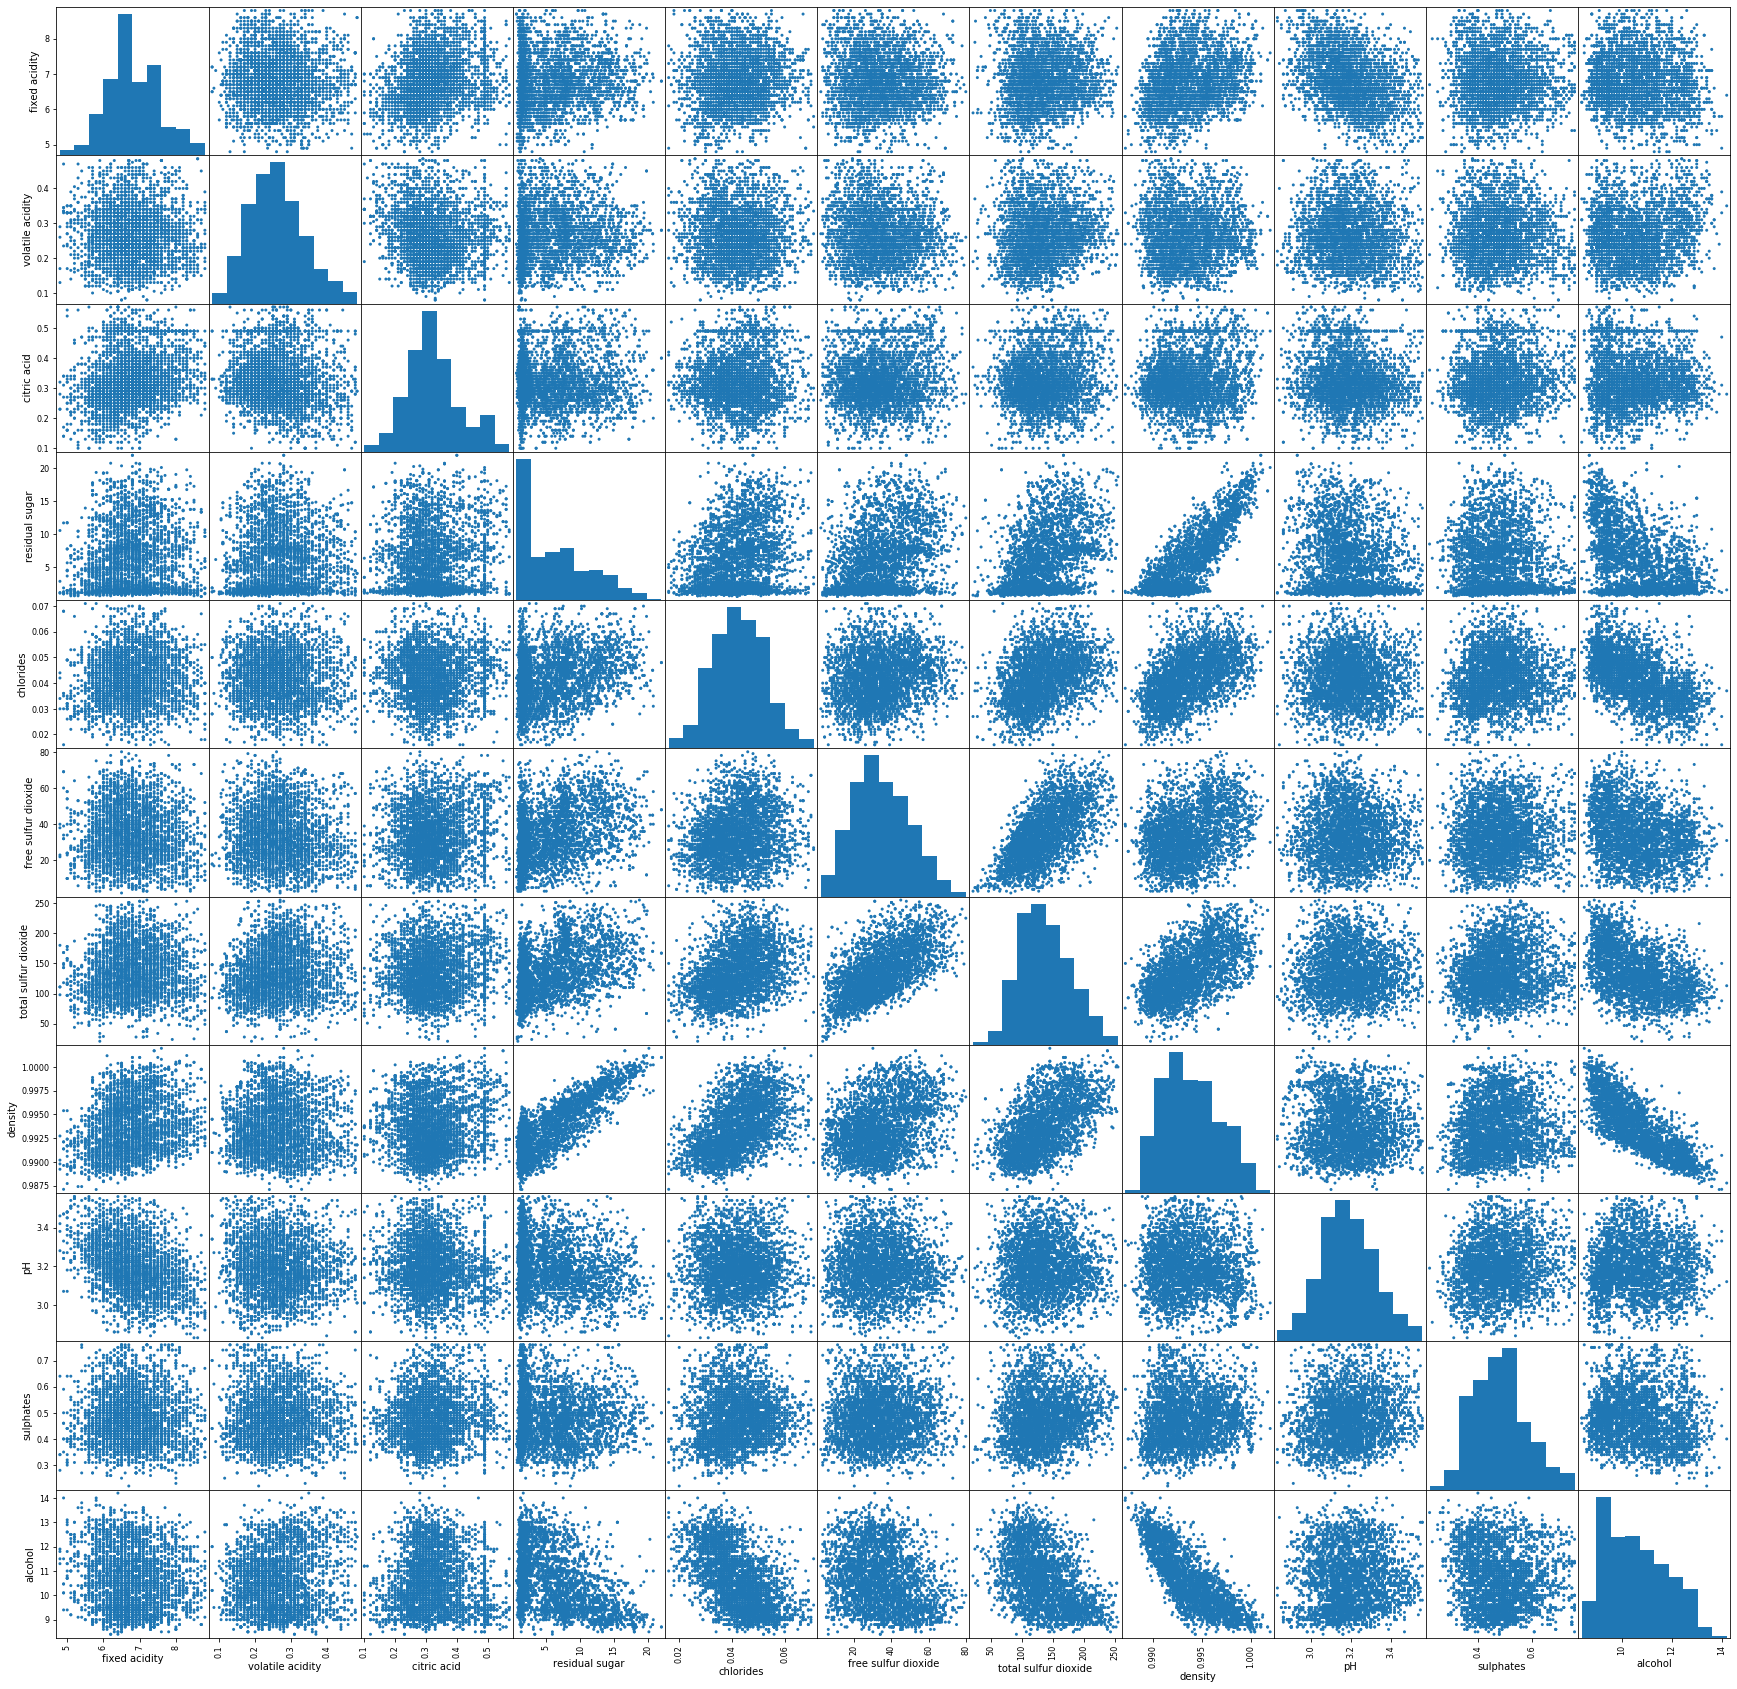

In [10]:
pd.plotting.scatter_matrix(good_data, alpha = 1, figsize = (30,30), diagonal = 'hist');

### Visualisation des données possédant une corrélation
Pour observer plus en détail le phénomène présenté au point précédent, on affiche une matrice possédant pour axe x la densité et pour axe y le taux de sucre. Une droite de régression est affichée sur ce même graphique. En observant ce résultat, il est possible de détecter un autre problème qu'il faut résoudre. En effet, on voit que certains points de données se situent très loin des autres. Il serait intéressant des les considérer comme des outliers et de les supprimer

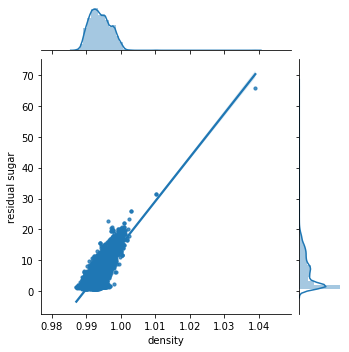

In [11]:
## dataFrame with the 2 columns wanted
density_residualSugar = dataWine[['density', 'residual sugar']]

## Display the points
graph = sns.JointGrid(x="density", y="residual sugar", data=density_residualSugar, height=5)

# Display a linear regression on the plot
graph = graph.plot_joint(sns.regplot, scatter_kws={"s": 10})

# Display the distribution of the points
graph = graph.plot_marginals(sns.distplot)

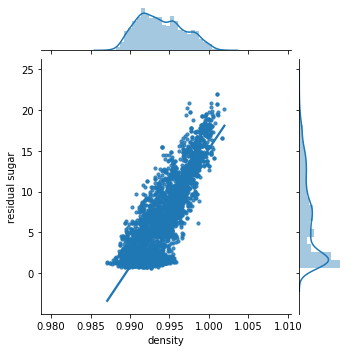

In [12]:
## Résultat obtenu après suppression des outliers

## dataFrame with the 2 columns wanted
density_residualSugar = good_data[['density', 'residual sugar']]

## Display the points
graph = sns.JointGrid(x="density", y="residual sugar", data=density_residualSugar, height=5)

# Display a linear regression on the plot
graph = graph.plot_joint(sns.regplot, scatter_kws={"s": 10})

# Display the distribution of the points
graph = graph.plot_marginals(sns.distplot)

### Normalisation des données 
Pour obtenir de meilleurs résultats, il est nécessaire de normaliser les différentes features présentes dans le set de données. En effet, ceci permet de traiter toutes ces features sur le même pied d'égalité, sans que l'une de celles-ci ait plus de poids que les autres.

In [13]:
## Normalize the features between 0 and 1
x = good_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
good_data = pd.DataFrame(x_scaled, columns=good_data.columns)

## Diplay the first five row of the datas
display(good_data.head(n=5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.550,0.469136,0.553191,0.939252,0.527273,0.551282,0.636752,0.935354,0.232877,0.425926,0.068966
1,0.375,0.543210,0.510638,0.046729,0.600000,0.153846,0.474359,0.463973,0.643836,0.500000,0.189655
2,0.825,0.493827,0.638298,0.294393,0.618182,0.358974,0.324786,0.538047,0.589041,0.407407,0.293103
3,0.600,0.370370,0.468085,0.369159,0.763636,0.576923,0.705128,0.571717,0.493151,0.333333,0.258621
4,0.600,0.370370,0.468085,0.369159,0.763636,0.576923,0.705128,0.571717,0.493151,0.333333,0.258621


### Séparation des données en 2 sets
Pour déterminer si les résultats obtenus par l'algorithme sont bons, il est important de séparer les données en 2 sets de données. Le premier est le set d'entraînement. Il représente 80% du set complet et est celui qui permet d'entraîner l'algorithme de ML. Le deuxième est un set de test qui permettra d'observer les résultats obtenus sur des données n'ayant pas été utilisée pour l'entraînement. Celui-ci représente 20% du set complet. La fonction "train_test_split" de sklearn permet de réaliser cette division en 2 sets de manière aléatoire. Dans celle-ci on peut spécifier la taille du test set.


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(good_data, 
                                                    good_quality, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3208 samples.
Testing set has 803 samples.


### Essai préliminaire de divers algorithms de ML
Une fois les données prétraitées, on teste préalablement quelques algorithms de ML de manière à observer les résultats obtenus par ces différents algorithms. Ceux-ci ne sont pas encore optimisés, mais il est déjà possible d'observer si les résultats obtenus sont bons ou non. Les différentes fonctions permettant ces essais rapides sont implémentés dans la librairie sklearn. Les résultats et les matrices de confusions obtenues sont indiqués ci-dessous

Précision avec régression logistique :  0.5268
Précision avec Support Vector Machine (SVM) :  0.5729
Précision avec Random Forest :  0.6401
Précision avec Neural Network (MLPClassifier) :  0.5517


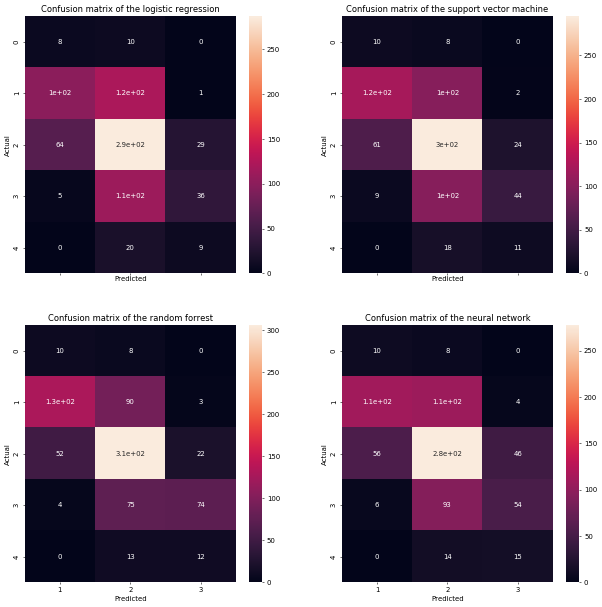

In [15]:
## Logistic regression
LR = LogisticRegression(random_state=1, solver='lbfgs', multi_class='multinomial', max_iter = 2000).fit(X_train, y_train)
yPredictLR = LR.predict(X_test)

## Support Vector Machine
SVM = svm.SVC(decision_function_shape="ovo").fit(X_train, y_train)
yPredictSVM = SVM.predict(X_test)

## RandomForestClassifier
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_train, y_train)
yPredictRF = RF.predict(X_test)

## Neural Network
NN = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(30, 20), random_state=1, max_iter = 500).fit(X_train, y_train)
yPredictNN = NN.predict(X_test)

## Display the results
print('Précision avec régression logistique : ', round(LR.score(X_test,y_test), 4))
print('Précision avec Support Vector Machine (SVM) : ', round(SVM.score(X_test, y_test), 4))
print('Précision avec Random Forest : ', round(RF.score(X_test, y_test), 4))
print('Précision avec Neural Network (MLPClassifier) : ', round(NN.score(X_test, y_test), 4))

## Compute the confusion matrix of every algorithms tested
confusion_matrixLR = pd.crosstab(y_test, yPredictLR, rownames=['Actual'], colnames=['Predicted'])
confusion_matrixSVM = pd.crosstab(y_test, yPredictSVM, rownames=['Actual'], colnames=['Predicted'])
confusion_matrixRF = pd.crosstab(y_test, yPredictRF, rownames=['Actual'], colnames=['Predicted'])
confusion_matrixNN = pd.crosstab(y_test, yPredictNN, rownames=['Actual'], colnames=['Predicted'])

## Display the confusion matrix of every algorithms tested
(fig, ax)=plt.subplots(nrows=2, ncols=2, figsize = (15, 15), dpi=50, sharex=True)

ax[0,0].set_title('Confusion matrix of the logistic regression')
sns.heatmap(confusion_matrixLR, annot=True, ax = ax[0, 0])

ax[0,1].set_title('Confusion matrix of the support vector machine')
sns.heatmap(confusion_matrixSVM, annot=True, ax = ax[0, 1])

ax[1,0].set_title('Confusion matrix of the random forrest')
sns.heatmap(confusion_matrixRF, annot=True, ax = ax[1, 0])

ax[1,1].set_title('Confusion matrix of the neural network')
sns.heatmap(confusion_matrixNN, annot=True, ax = ax[1, 1])
plt.show()